This is my individual planning report

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

<h2>1) Data Description:</h2>

<ul>
  <li>players.csv: 197 rows × 7 columns</li>
  <li>sessions.csv: 1536 rows × 5 columns</li>
</ul>

Players.csv (196 observations 7 variables)
| Variables       | Type | Meaning |
| :---------------- | :------: | ----: |
| Experience       |   Character   | Levels include Beginner, Amateur, Regular, Pro, Veteran. Player’s self-reported/assigned experience tier. |
| Subscribe         |   Logical   | Whether the player is subscribed to the newsletter |
| hashedEmail    |   Character  | unique player identifier (hash of email); use to join with sessions.csv |
| played_hours |  Double (Numerical)    | Total hours played |
| name         |   Categorical    | Player’s first name |
| gender    |  Categorical   | Players' gender includes Male, Female, Non-binary, Prefer not to say, |
| age |  Double (Numerical)   | Player’s age in years |

<ul>
  <li>Mean of played_hours: 5.85</li>
  <li>Mean of age: 21.14</li>
</ul>

Sessions.csv (1535 observations 5 variables)
| Variables       | Type | Meaning |
| :---------------- | :------: | ----: |
| hashedEmail       |   Character   | Used to identify a player from players.csv |
| start_time         |   Character   | Relative session date and start time for user |
| end_time    |   Character  | Relative session date and end time for user |
| original_start_time |  Double (Numerical)    | Session start time recorded in UNIX time, (milliseconds) |
| original_end_time         |   Double (Numerical)    | Session end time recorded in UNIX time, (milliseconds) |

<ul>
  <li>Mean of original_start_time: 1.719e+12</li>
  <li>Mean of original_end_time: 1.719e+12</li>
</ul>

<h4>Visible Issues:</h4>

<ul>
  <li>A small number of sessions have no end_time, so duration can’t be computed for those rows.</li>
  <li>The units for original_start_time and original_end_time are not stated</li>
  <li>There are players in players.csv who never appear in sessions.csv</li>
  <li>A few of the ages in players.csv have NA, the age range also spans from very young to very old</li>
  <li>Many players in players.csv have 0 played_hours and played_hours has several large outliers</li>
    
</ul>

<h4>Non-Visible Issues:</h4>

<ul>
  <li>Not all sessions are active, players could be AFK</li>
  <li>Seasonal events or school breaks could impact player' numbers and subscriptions</li>
  <li>There could be shared accounts under the same hashedEmail</li>
  <li>Recruitment bias, such as players coming from a research server</li>
</ul>

<h4>How Data Was Collected</h4>

<ul>
  <li>A UBC research group ran a Minecraft research server and logged player data (players.csv) and session activity per player (sessions.csv).</li>
  <li>Players’ actions and session times were recorded as they played in the Minecraft world</li>
</ul>







<h2>2) Question:</h2>
<h4>Broad Question: <em>What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?</em> </h4>

<h4>Specific Research Question: <em>Can a player’s experience tier and number of sessions played, predict whether they subscribe to the newsletter?</em> </h4>


<h4>Use of Datasets to Help Answer Research Question:</h4>

<ul>
  <li>Response Variable is subscribe(logical) from players.csv, which returns true or false</li>
  <li>First Explanatory Variable is experience(categorical) from players.csv, which returns the experience level of a player</li>
  <li> Another Explanatory variable is hashedEmail. For each player in players.csv, we count the number of occurrences of their hashedEmail in sessions.csv.
This count corresponds to the total number of sessions that the player has completed.
Players whose hashedEmail does not appear in sessions.csv are assigned a count of 0 (indicating no recorded sessions).
We will create a new variable, n_sessions, that represents the players' behaviors, in this case, the amount of sessions they played. </li>
</ul>

<h4>Wrangling Plan:</h4>

<ul>
  <li>Order sessions by player and start/end_time</li>
  <li>Count the number of sessions for each player</li>
  <li>Create a new variable n_sessions which stores that count</li>
  <li>Combine both data sets, players.csv and sessions.csv</li>
  <li>Keep the columns subscribe, n_sessions, and experience </li>
</ul>

variable,mean_value
<chr>,<dbl>
Age,21.14
played_hours,5.85


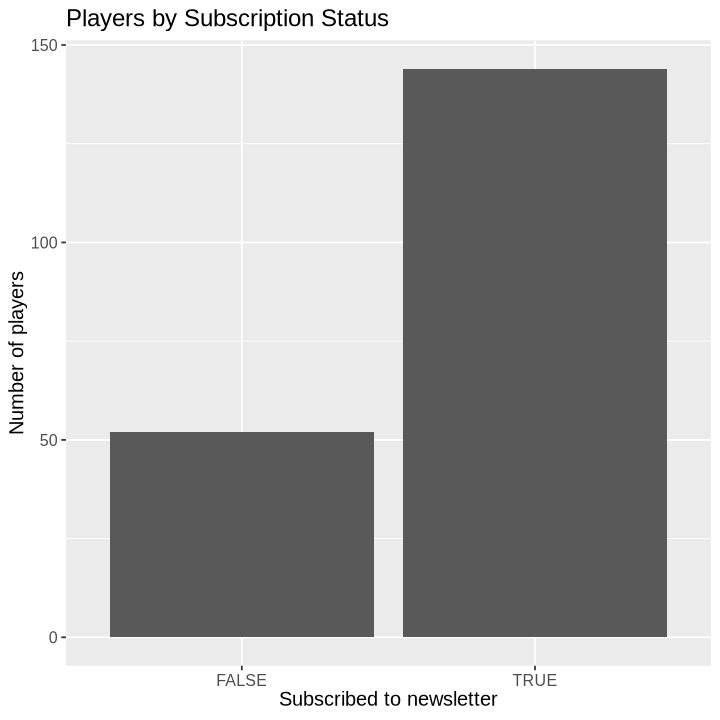

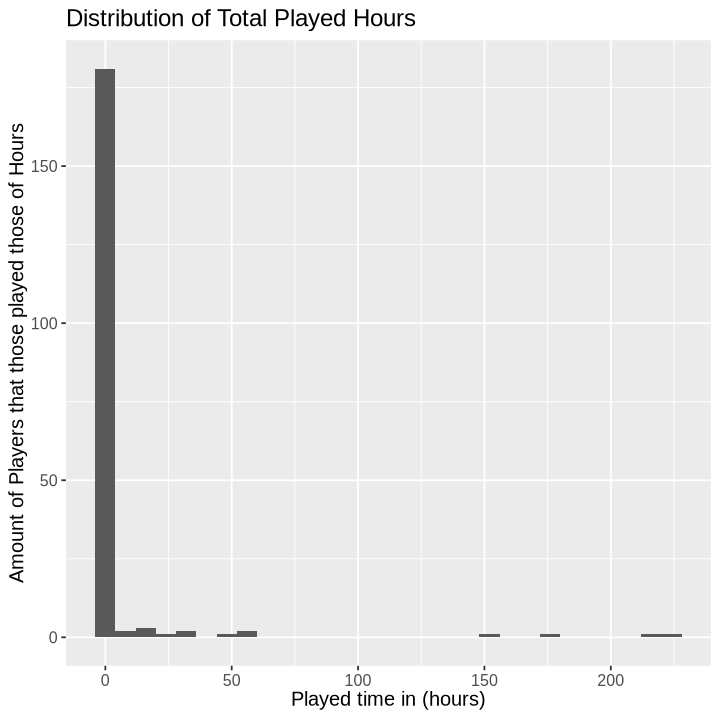

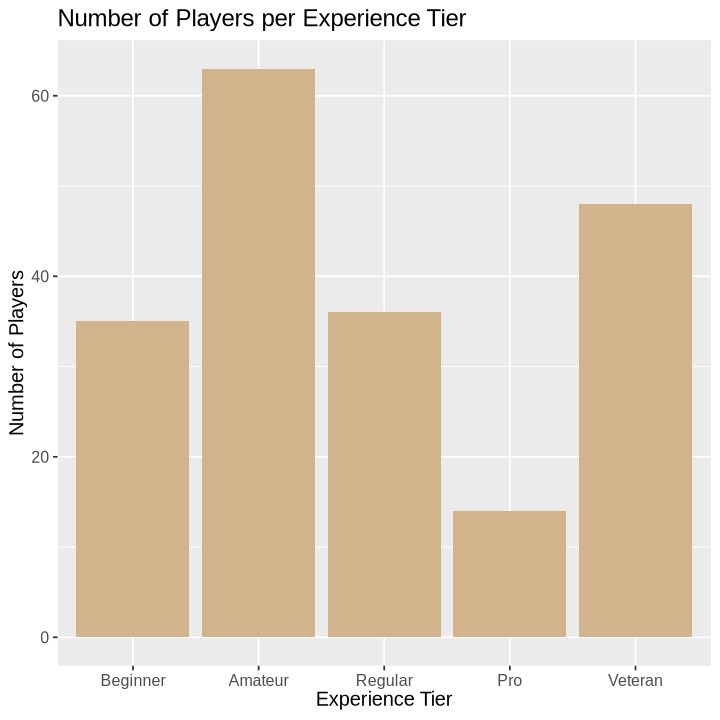

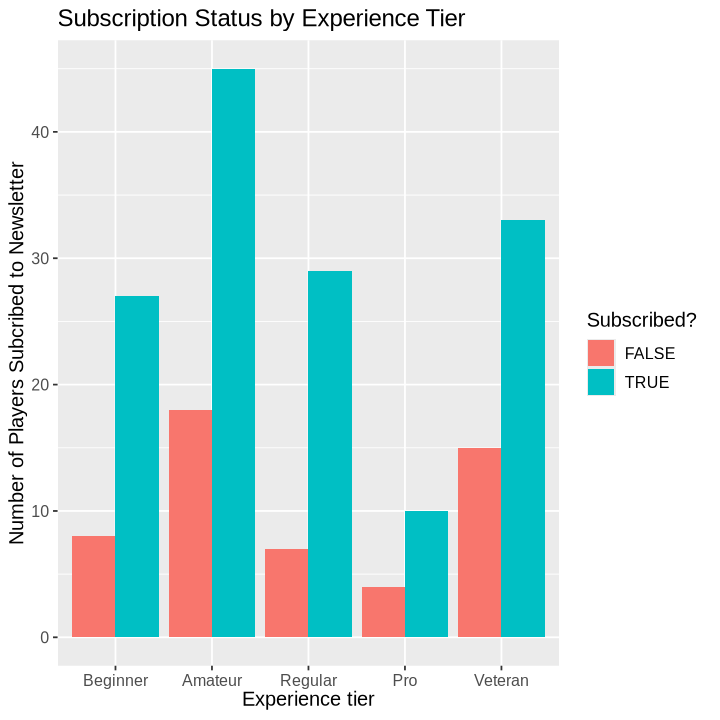

In [12]:
#3) Exploratory Data Analysis and Visualization

#Loading the sets into R
players  <- read_csv("players.csv", show_col_types = FALSE)
sessions <- read_csv("sessions.csv", show_col_types = FALSE)

#Tidying players.csv
players_tidy <- players |>
  mutate(
    experience = factor(experience, levels = c("Beginner","Amateur","Regular","Pro","Veteran")),
    gender     = as.factor(gender))

#Tidying sessions.csv
sessions_tidy <- sessions |>
  arrange(hashedEmail, start_time) |>
  group_by(hashedEmail)

#Calculate Mean for players.csv
players_means <- players_tidy |>
  summarize(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 2))) |>
  pivot_longer(cols = played_hours:Age, 
               names_to = "variable",
               values_to = "mean_value") |>
  arrange(variable)

players_means

#Exploratory Visualizations
options(repr.plot.width = 6, repr.plot.height = 6)

# Subcribers to Newsletter Count
players_tidy |>
  count(subscribe) |>
  ggplot(aes(x = subscribe, y = n)) +
  geom_bar(stat = "identity") +
  labs(title = "Players by Subscription Status",
       x = "Subscribed to newsletter",
       y = "Number of players") +
  theme(text = element_text(size = 12))

# Played hours histogram
ggplot(players_tidy, aes(x = played_hours)) +
  geom_histogram(binwidth = 8) +
  labs(title = "Distribution of Total Played Hours",
       x = "Played time in (hours)",
       y = "Amount of Players that those played those of Hours") +
  theme(text = element_text(size = 12))

#Number of players per experience tier
players_tidy |>
  count(experience) |>
  ggplot(aes(x = experience, y = n)) +
  geom_bar(stat = "identity", fill = "tan") +
  labs(
    title = "Number of Players per Experience Tier",
    x = "Experience Tier",
    y = "Number of Players") +
  theme(text = element_text(size = 12))


# Subscribed 
ggplot(players_tidy, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription Status by Experience Tier",
    x = "Experience tier",
    y = "Number of Players Subcribed to Newsletter", 
    fill = "Subscribed?") +
  theme(text = element_text(size = 12))


<h3>Explaining Insights from Plots:</h3>

<h5>Plot 1:</h5>
<ul>
  <li>Bar plots reveal the class balance between subscribed and not subscribed.</li>
  <li>Shows us that a lot more players are subscribed to the newsletter</li>
</ul>

<h5>Plot 2:</h5>
<ul>
  <li>Data is heavily congested on the left side</li>
  <li>Shows that many players have low hours, and a few have very high total hours</li>
  <li>Almost no players played between 50 and 150 hours</li>
</ul>

<h5>Plot 3:</h5>
<ul>
  <li>The most common experience tier for players is amateur</li>
  <li>The least common experience tier for players is pro</li>
  <li>Beginner and regular have very similar amounts of players, with veteran having slightly more players</li>
</ul>

<h5>Plot 4:</h5>
<ul>
  <li>Bar plots show that amateur players are the most likely to be subscribed to the newsletter</li>
  <li>Pro players have the least amount of players that are subscribed</li>
  <li>Generally, most tiers of experience have more subscribed players than unsubscribed</li>
</ul>

<h2>4) Methods and Plan</h2>

<h4>Method:</h4>

<p>I will use K-nearest neighbours classification to predict whether subscribe is a yes or a no based on a player's experience and their amount of sessions played. I chose K-NN classification because I am predicting a categorical variable, subscribe, from one or more predictors.</p>

<ul>
  <li>This method is subscribe is a categorical variable, and the K-NN algorithm is extremely useful in predicting labels based on predictors. The K_NN also does not require the data to have a certain pattern or a linear relationship to be viable.</li>
  <li>We must standardize both predictors, other than that, no assumptions need to be made.</li>
</ul>